In [1]:
# importa, seta configuracao, le arquivo e tira colunas 'unnamed'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df = pd.read_csv('dados_filtrados_v4.csv')

In [2]:
alunos = df["ID Aluno"].unique()
disciplinas = df['Código da disciplina'].unique()
# myColumns = ["curso", "saiu", "Cotista", "Raça", "Sexo", "Tipo de Escola"] + list(disciplinas)
newDf = pd.DataFrame(columns=disciplinas, index=alunos)
newDf[newDf.columns] = 0

In [3]:
df = df[['Código da disciplina', 'ID Aluno']]

In [4]:
for a in alunos:
    dis = df[df['ID Aluno'] == a]
    for d in dis['Código da disciplina']:
        newDf.at[a, d] +=1

In [5]:
newDf["curso"] = 0
newDf["saiu"] = 0
newDf["Tipo de Escola"] = 0
newDf["Raça"] = 0
newDf["Sexo"] = 0
newDf["Cotista"] = 0
newDf["Ingresso_unb"] = 0

In [6]:
df = pd.read_csv('dados_filtrados_v4.csv')
for aluno in alunos:
    b = df[df["ID Aluno"] == aluno]
    newDf.at[aluno, 'curso'] =  b.iloc[0]['Curso'].astype(int)
    newDf.at[aluno, 'saiu'] =  b.iloc[0]['saiu'].astype(int)
    newDf.at[aluno, 'Tipo de Escola'] =  b.iloc[0]['Tipo de Escola'].astype(int)
    newDf.at[aluno, 'Raça'] =  b.iloc[0]['Raça'].astype(int)
    newDf.at[aluno, 'Sexo'] =  b.iloc[0]['Sexo'].astype(int)
    newDf.at[aluno, 'Cotista'] =  b.iloc[0]['Cotista'].astype(int)
    newDf.at[aluno, 'Ingresso_unb'] =  b.iloc[0]['Período de Ingresso na Unb'].astype(int)
    

In [7]:
columns = newDf.columns
columns = list(columns[-7:]) + list(columns[:-7])
newDf = newDf[columns]

In [8]:
newDf.to_csv("aluno_quant_Materias.csv")

In [9]:
newDf = pd.read_csv('aluno_quant_Materias.csv', index_col=0)

In [10]:
#filtra cotistas
dfCotistas = newDf[newDf["Cotista"]==1]
dfNaoCotista = newDf[newDf["Cotista"]==0]

In [11]:
dfCotistas.to_csv("aluno_quant_Materias_cotistas.csv")
dfNaoCotista.to_csv("aluno_quant_Materias_nao_cotistas.csv")

In [12]:
dfCotistas = pd.read_csv("aluno_quant_Materias_cotistas.csv", index_col=0)
dfNaoCotista = pd.read_csv("aluno_quant_Materias_nao_cotistas.csv", index_col=0)

In [13]:
for i in range(0, 6):
    a = dfCotistas[dfCotistas["curso"]== i]
    a.to_csv("aluno_quant_Materias_cotistas_" + str(i)+ ".csv")

In [14]:
for i in range(0, 6):
    a = dfNaoCotista[dfNaoCotista["curso"]== i]
    a.to_csv("aluno_quant_Materias_nao_cotistas_" + str(i)+ ".csv")

In [15]:
df0 = pd.read_csv("aluno_quant_Materias_cotistas_0.csv", index_col=0)
df1 = pd.read_csv("aluno_quant_Materias_cotistas_1.csv", index_col=0)
df2 = pd.read_csv("aluno_quant_Materias_cotistas_2.csv", index_col=0)
df3 = pd.read_csv("aluno_quant_Materias_cotistas_3.csv", index_col=0)
df4 = pd.read_csv("aluno_quant_Materias_cotistas_4.csv", index_col=0)
df5 = pd.read_csv("aluno_quant_Materias_cotistas_5.csv", index_col=0)

In [16]:
#filtra materias
undropableCol = ["curso","saiu","Cotista","Raça","Sexo","Tipo de Escola"]
dropVal = 70
df0.drop([col for col, val in df0.sum().iteritems() if val < dropVal and col not in undropableCol], axis=1, inplace=True)
df1.drop([col for col, val in df1.sum().iteritems() if val < dropVal and col not in undropableCol], axis=1, inplace=True)
df2.drop([col for col, val in df2.sum().iteritems() if val < dropVal and col not in undropableCol], axis=1, inplace=True)
df3.drop([col for col, val in df3.sum().iteritems() if val < dropVal and col not in undropableCol], axis=1, inplace=True)
df4.drop([col for col, val in df4.sum().iteritems() if val < dropVal and col not in undropableCol], axis=1, inplace=True)
df5.drop([col for col, val in df5.sum().iteritems() if val < dropVal and col not in undropableCol], axis=1, inplace=True)


In [30]:
disciplinas = list(df0.columns[7:]) #- ["curso","saiu","Cotista","Raça","Sexo","Tipo de Escola"]
s = pd.Series(index = disciplinas, dtype=float)
# disciplinas

In [31]:
a = df0.sum()
for d in disciplinas:
#     print (type(d))
    b  = df0[df0[str(d)]>0].count()
    s[d] = a[str(d)]/b[0]

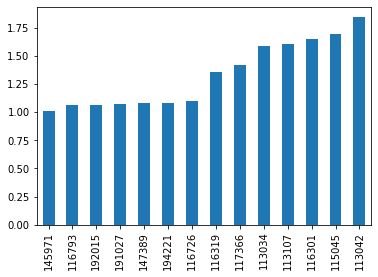

In [32]:
s.sort_values().plot.bar()

In [23]:
s

Ingresso_unb    20115.375000
116301              1.656250
116793              1.067227
147389              1.080808
116319              1.363636
113042              1.846154
113034              1.590909
145971              1.009259
192015              1.069444
113107              1.607143
115045              1.698413
194221              1.083916
116726              1.097561
191027              1.075949
117366              1.421488
dtype: float64

In [20]:
df2["saiu"].value_counts()

 0    100
 1     85
-1     27
Name: saiu, dtype: int64

In [22]:
a = newDf[newDf['curso']== 3]
a["saiu"].value_counts()

-1    521
 1    466
 0    411
Name: saiu, dtype: int64

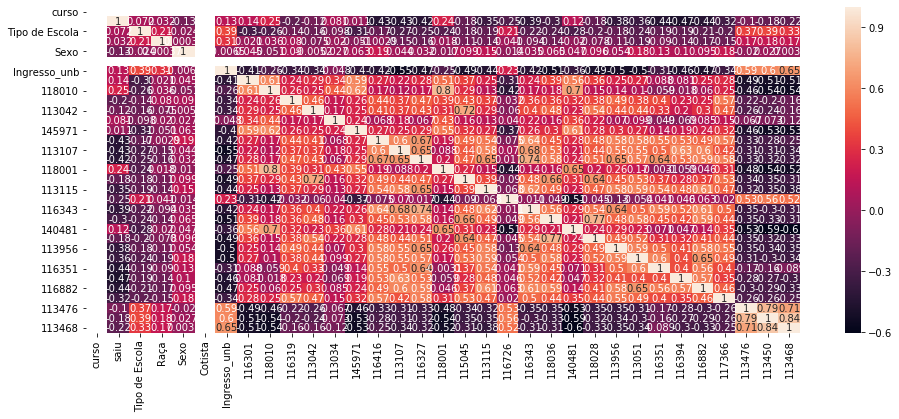

In [33]:
import seaborn as sns
f = df2.corr()
plt.figure(figsize=(16, 6))
sns.heatmap(f, annot=True)